## Wulkanizm w holocenie 

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Przygotowanie danych

Plik raw_data.csv zawiera informacje na temat erupcji wulkanów pobrane ze strony https://volcano.si.edu/.

Zaimportuj zawarte w pliku dane do notatnika a następnie utwórz na ich podstawie tablicę `eruptions_data` wykonaną według następujących wytycznych:

- Tablica powinna zawierać wyłącznie następujące elementy:</br>

    > Indeks: Eruption Number</br>
   
    > Kolumny: Volcano Name, Eruption Category, VEI, Start Year, Start Month, Start Day, End Year, End Month, End Day, Evidence Type, Evidence Method</br>

- Indeks tablicy tworzony jest w oparciu o kolumnę Eruption Number z wczytanej tablicy danych.
- Kolumny Evidence Type i Evidence Method powstają poprzez rozbicie kolumny Evidence Method (dating) zawartej w danych wejściowych na dwie osobne kolumny. Zamień brakujące wartości w tych kolumnach (NaN) odpowiednio na 'Uncertain' i 'Unspecified'.
- Tablica nie powinna zawierać wierszy dotyczących podważanych (ang. discredited) erupcji oraz erupcji, dla których nie została określona wartość VEI (Volcanic Explosivity Index).
- Z nazw zawartych w kolumnie Eruption Category należy usunąć słowo "Eruption" pozostawiając tylko poprzedzające go człony zawartych w niej określeń.
- Niektóre z erupcji mają wpisane wartości miesiąca i dnia ich początku lub końca jako 0, należy zmienić te wartości na NaN.


In [ ]:
# YOUR CODE HERE
raw = pd.read_csv('./raw_data.csv', skiprows=1)
raw.index = raw['Eruption Number']
raw = raw[['Volcano Name', 'Eruption Category', 'VEI', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Evidence Method (dating)']]
raw[['Evidence Type', 'Evidence Method']] = raw['Evidence Method (dating)'].str.split(': ', expand=True)
raw['Evidence Type'] = raw['Evidence Type'].fillna('Uncertain')
raw['Evidence Method'] = raw['Evidence Method'].fillna('Unspecified')
raw[raw['Evidence Method'] == 'Unspecified']
del(raw['Evidence Method (dating)'])
raw = raw[raw['Eruption Category'] != 'Discredited Eruption']
raw = raw.dropna(subset=['VEI']) #chatgpt, nie znalam subset
raw['Eruption Category'] = raw['Eruption Category'].str.split(' ', expand=True)[0]
raw[['Start Month', 'Start Day', 'End Month', 'End Day']] = raw[['Start Month', 'Start Day', 'End Month', 'End Day']].replace(0, np.nan)
eruptions_data = raw
eruptions_data.style.format(precision=0).hide(subset = eruptions_data.index[10:-10])


,Volcano Name,Eruption Category,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day,Evidence Type,Evidence Method
Eruption Number,,,,,,,,,,,
22486,Cotopaxi,Confirmed,2,2022,10,21,2022,12,19,Observations,Reported
22481,Taal,Confirmed,1,2022,10,5,2022,10,29,Observations,Reported
22458,Turrialba,Confirmed,1,2022,7,17,2022,7,17,Observations,Reported
22453,Ulawun,Confirmed,2,2022,6,2,2022,6,2,Observations,Reported
22454,Raung,Confirmed,2,2022,5,14,2022,9,27,Observations,Satellite (infrared)
22445,Gaua,Confirmed,1,2022,5,3,2022,5,3,Observations,Reported
22451,Purace,Confirmed,1,2022,3,29,2022,3,29,Observations,Reported
22430,Ambrym,Confirmed,1,2022,1,25,2022,2,2,Observations,Reported
22456,Chikurachki,Confirmed,2,2022,1,17,2022,10,17,Observations,Satellite (visual)


In [ ]:
# YOUR CODE HERE
big_eruptions_data = eruptions_data[eruptions_data['VEI'] == 7]
big_eruptions_data

,Volcano Name,Eruption Category,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day,Evidence Type,Evidence Method
Eruption Number,,,,,,,,,,,
16231,Tambora,Confirmed,7.0,1812,NaN,NaN,1815.0,7.0,15.0,Observations,Reported
20843,Rinjani,Confirmed,7.0,1257,7.0,1.0,NaN,NaN,NaN,Sidereal,Ice Core
13879,Santorini,Confirmed,7.0,-1610,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (calibrated)
20904,"Blanco, Cerro",Confirmed,7.0,-2300,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (calibrated)
16980,Kikai,Confirmed,7.0,-4350,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (uncalibrated)
20610,Crater Lake,Confirmed,7.0,-5680,NaN,NaN,NaN,NaN,NaN,Sidereal,Ice Core
18903,Kurile Lake,Confirmed,7.0,-6440,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (calibrated)


In [ ]:
# YOUR CODE HERE
big_eruptions_data = eruptions_data[eruptions_data['VEI'] == 7]
big_eruptions_data

,Volcano Name,Eruption Category,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day,Evidence Type,Evidence Method
Eruption Number,,,,,,,,,,,
16231,Tambora,Confirmed,7.0,1812,NaN,NaN,1815.0,7.0,15.0,Observations,Reported
20843,Rinjani,Confirmed,7.0,1257,7.0,1.0,NaN,NaN,NaN,Sidereal,Ice Core
13879,Santorini,Confirmed,7.0,-1610,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (calibrated)
20904,"Blanco, Cerro",Confirmed,7.0,-2300,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (calibrated)
16980,Kikai,Confirmed,7.0,-4350,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (uncalibrated)
20610,Crater Lake,Confirmed,7.0,-5680,NaN,NaN,NaN,NaN,NaN,Sidereal,Ice Core
18903,Kurile Lake,Confirmed,7.0,-6440,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (calibrated)


In [ ]:
# YOUR CODE HERE
big_eruptions_data = eruptions_data[eruptions_data['VEI'] == 7]
big_eruptions_data

,Volcano Name,Eruption Category,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day,Evidence Type,Evidence Method
Eruption Number,,,,,,,,,,,
16231,Tambora,Confirmed,7.0,1812,NaN,NaN,1815.0,7.0,15.0,Observations,Reported
20843,Rinjani,Confirmed,7.0,1257,7.0,1.0,NaN,NaN,NaN,Sidereal,Ice Core
13879,Santorini,Confirmed,7.0,-1610,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (calibrated)
20904,"Blanco, Cerro",Confirmed,7.0,-2300,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (calibrated)
16980,Kikai,Confirmed,7.0,-4350,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (uncalibrated)
20610,Crater Lake,Confirmed,7.0,-5680,NaN,NaN,NaN,NaN,NaN,Sidereal,Ice Core
18903,Kurile Lake,Confirmed,7.0,-6440,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (calibrated)


### Konstrukcja szeregów rodzielczych 

#### a) Forma tabelaryczna
Przygotuj szeregi rozdzielcze VEI w formie tablic zawierających następujące elementy:

> Indeks: VEI </br>
> Wartości VEI posortowane od najmniejszej do największej.

> Kolumny: f, cf, rf, crf </br>
> Zliczenia poszczególnych kategorii (ang. frequency, absolute frequency), zliczenia skumulowane poszczególnych kategorii (ang. cumulative frequency, cumulative absolute frequency),  rf - częstość zliczeń poszczególnych kategorii (ang. relative frequency), crf - skumulowana częstość zliczeń poszczególnych kategorii (ang. cumulative relative frequency)

Przygotuj osobne tablice dla wszystkich erupcji (`vei_data_1`), erupcji potwierdzonych (`vei_data_2`) i erupcji niepotwierdzonych (`vei_data_3`).


In [ ]:
# Wszystkie erupcje
frequency = eruptions_data['VEI'].value_counts().sort_index()
cumulative_frequency = frequency.cumsum()
relative_frequency = frequency / frequency.sum()
cumulative_relative_frequency = relative_frequency.cumsum()
vei_data_1 = pd.DataFrame({'f': frequency, 'cf': cumulative_frequency, 'rf': relative_frequency, 'crf': cumulative_relative_frequency})
styled_vei_data_1 = vei_data_1.style.format({'rf':'{:0.4f}', 'crf':'{:0.4f}'}, precision=0).format_index(precision=0)
styled_vei_data_1

,f,cf,rf,crf
VEI,,,,
0,1007,1007,0.1215,0.1215
1,1384,2391,0.1670,0.2886
2,3991,6382,0.4817,0.7703
3,1152,7534,0.1390,0.9094
4,511,8045,0.0617,0.9710
5,180,8225,0.0217,0.9928
6,53,8278,0.0064,0.9992
7,7,8285,0.0008,1.0000


In [ ]:
# Potwierdzone erupcje
confirmed = eruptions_data[eruptions_data['Eruption Category'] == 'Confirmed']
frequency = confirmed['VEI'].value_counts().sort_index()
cumulative_frequency = frequency.cumsum()
relative_frequency = frequency / frequency.sum()
cumulative_relative_frequency = relative_frequency.cumsum()
vei_data_2 = pd.DataFrame({'f': frequency, 'cf': cumulative_frequency, 'rf': relative_frequency, 'crf': cumulative_relative_frequency})
styled_vei_data_2 = vei_data_2.style.format({'rf':'{:0.4f}', 'crf':'{:0.4f}'}, precision=0).format_index(precision=0)
styled_vei_data_2

,f,cf,rf,crf
VEI,,,,
0,803,803,0.1051,0.1051
1,1227,2030,0.1606,0.2657
2,3727,5757,0.4878,0.7535
3,1133,6890,0.1483,0.9018
4,510,7400,0.0668,0.9686
5,180,7580,0.0236,0.9921
6,53,7633,0.0069,0.9991
7,7,7640,0.0009,1.0000


In [ ]:
# Niepotwierdzone erupcje
not_confirmed = eruptions_data[eruptions_data['Eruption Category'] == 'Uncertain']
frequency = not_confirmed['VEI'].value_counts().sort_index()
cumulative_frequency = frequency.cumsum()
relative_frequency = frequency / frequency.sum()
cumulative_relative_frequency = relative_frequency.cumsum()
vei_data_3 = pd.DataFrame({'f': frequency, 'cf': cumulative_frequency, 'rf': relative_frequency, 'crf': cumulative_relative_frequency})
styled_vei_data_3 = vei_data_3.style.format({'rf':'{:0.4f}', 'crf':'{:0.4f}'}, precision=0).format_index(precision=0)
styled_vei_data_3

,f,cf,rf,crf
VEI,,,,
0,204,204,0.3163,0.3163
1,157,361,0.2434,0.5597
2,264,625,0.4093,0.9690
3,19,644,0.0295,0.9984
4,1,645,0.0016,1.0000


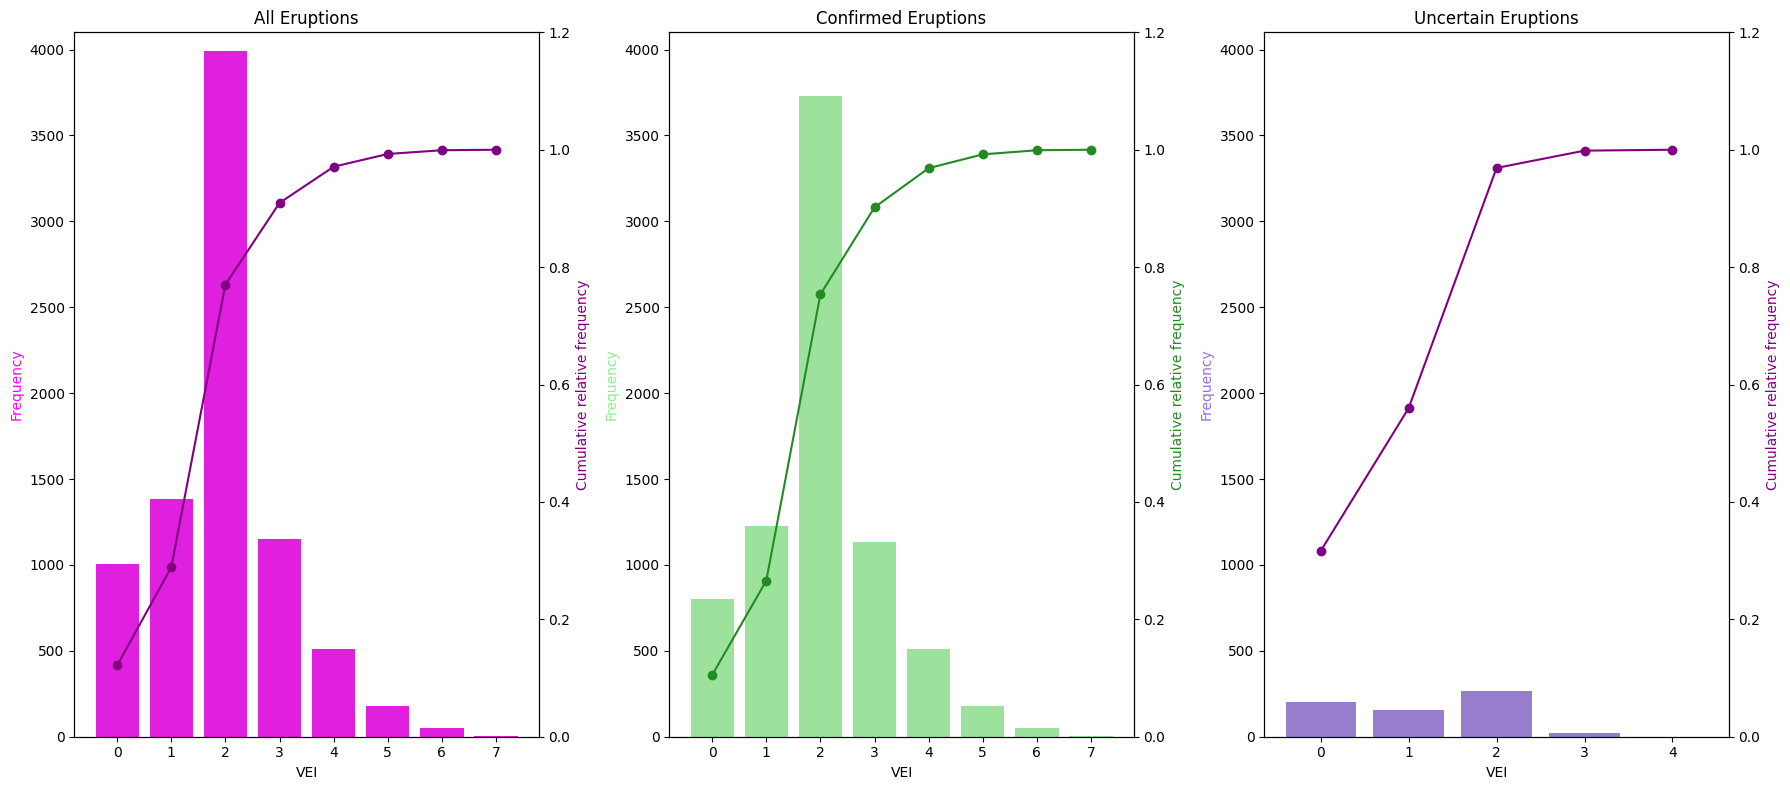

In [ ]:
# YOUR CODE HERE
import matplotlib.ticker as ticker 
fig, axes = plt.subplots(1,3, figsize = (18,8))

sns.barplot(data=vei_data_1.reset_index(), x='VEI', y='f', ax=axes[0], color='magenta')
axes[0].set_title('All Eruptions')
axes[0].yaxis.label.set_color('magenta')
axes[0].set_ylim(0, 4100)
ax1 = axes[0].twinx()
ax1.plot(vei_data_1['crf'], color='purple', marker='o', label='Cumulative RF')
ax1.set_ylabel('Cumulative relative frequency')
ax1.yaxis.label.set_color('purple')
ax1.set_ylim(0, 1.2)

sns.barplot(data=vei_data_2.reset_index(), x='VEI', y='f', ax=axes[1], color='lightgreen')
axes[1].set_title('Confirmed Eruptions')
axes[1].yaxis.label.set_color('lightgreen')
axes[1].set_ylim(0, 4100)
ax2 = axes[1].twinx()
ax2.plot(vei_data_2['crf'], color='forestgreen', marker='o')
ax2.set_ylabel('Cumulative relative frequency')
ax2.yaxis.label.set_color('forestgreen')
ax2.set_ylim(0, 1.2)

sns.barplot(data=vei_data_3.reset_index(), x='VEI', y='f', ax=axes[2], color='mediumpurple')
axes[2].set_title('Uncertain Eruptions')
axes[2].yaxis.label.set_color('mediumpurple')
axes[2].set_ylim(0, 4100)
ax3 = axes[2].twinx()
ax3.plot(vei_data_3['crf'], color='purple', marker='o', label='Cumulative RF')
ax3.set_ylabel('Cumulative relative frequency')
ax3.yaxis.label.set_color('purple')
ax3.set_ylim(0, 1.2)




for ax in axes:
    ax.set_xlabel('VEI')
    ax.set_ylabel('Frequency')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))  #metoda z chatgpt

plt.tight_layout()
plt.show()

### Konstrukcja szeregów rodzielczych - bardziej skomplikowane tablice

#### a) Forma tabelaryczna
Przygotuj szeregi rozdzielcze VEI w formie tablicy `vei_data` zawierającej następujące elementy:

> Indeks: VEI </br>
> Wartości VEI posortowane od najmniejszej do największej.

> Kolumny: 2-poziomowe nagłówki, dla każdego z nagłówków 1 poziomu powtarza się cały zestaw nagłówków 2 poziomu

>> Nagłówki 1 poziomu: All, Confirmed Eruption, Uncertain Eruption </br>
>> Całość danych oraz grupy wyznaczone na podstawie kolumny Eruption category</br>

>> Nagłówki 2 poziomu: f, cf, rf, crf </br>
>> Zliczenia poszczególnych kategorii (ang. frequency, absolute frequency), zliczenia skumulowane poszczególnych kategorii (ang. cumulative frequency, cumulative absolute frequency),  rf - częstość zliczeń poszczególnych kategorii (ang. relative frequency), crf - skumulowana częstość zliczeń poszczególnych kategorii (ang. cumulative relative frequency)


In [ ]:
# YOUR CODE HERE
all_counts = eruptions_data['VEI'].value_counts().sort_index()
confirmed = eruptions_data[eruptions_data['Eruption Category'] == 'Confirmed']['VEI'].value_counts().sort_index()
uncertain = eruptions_data[eruptions_data['Eruption Category'] == 'Uncertain']['VEI'].value_counts().sort_index()

all_index = sorted(eruptions_data['VEI'].unique())
all_counts = all_counts.reindex(all_index)
confirmed = confirmed.reindex(all_index)
uncertain = uncertain.reindex(all_index)

def calc(counts):
    f = counts
    cf = counts.cumsum()
    rf = counts / counts.sum()
    crf = rf.cumsum()
    return pd.DataFrame({'f': f, 'cf': cf, 'rf': rf, 'crf': crf})

vei_data = pd.concat([calc(all_counts), calc(confirmed), calc(uncertain)], axis=1, keys=['All eruptions', 'Confirmed Eruptions', 'Uncertain Eruptions'])

vei_data.style.format(precision=4).format_index(precision=0)


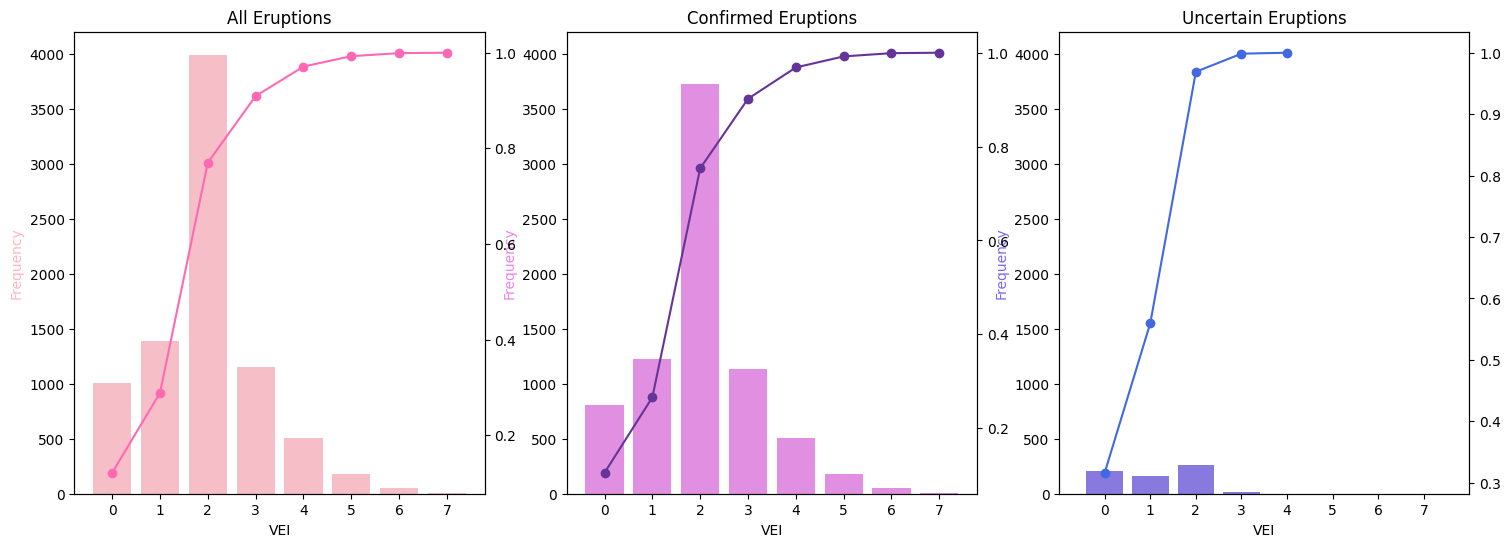

In [ ]:
# YOUR CODE HERE
import matplotlib.ticker as ticker 

fig, axes = plt.subplots(1,3, figsize = (18,6))

sns.barplot(x = vei_data.index, y = vei_data['All eruptions']['f'].values, ax = axes[0], color='lightpink')
axes[0].set_title("All Eruptions")
axes[0].yaxis.label.set_color('lightpink')
axes[0].set_ylim(0, 4200)
ax1 = axes[0].twinx()
ax1.plot(vei_data['All eruptions']['crf'], color = 'hotpink', marker = "o")
ax1.yaxis.label.set_color('hotpink')


sns.barplot(x = vei_data.index, y = vei_data['Confirmed Eruptions']['f'].values, ax = axes[1], color='violet')
axes[1].set_title("Confirmed Eruptions")
axes[1].yaxis.label.set_color('violet')
axes[1].set_ylim(0, 4200)
ax2 = axes[1].twinx()
ax2.plot(vei_data['Confirmed Eruptions']['crf'], color = 'rebeccapurple', marker = "o")
ax2.yaxis.label.set_color('rebeccapurple')


sns.barplot(x = vei_data.index, y = vei_data['Uncertain Eruptions']['f'].values, ax = axes[2], color='mediumslateblue')
axes[2].set_title("Uncertain Eruptions")
axes[2].yaxis.label.set_color('mediumslateblue')
axes[2].set_ylim(0, 4200)
axes[2].set_xlim(-1, 8)
ax3 = axes[2].twinx()
ax3.plot(vei_data['Uncertain Eruptions']['crf'], color = 'royalblue', marker = "o")
ax3.yaxis.label.set_color('royalblue')

for ax in axes:
    ax.set_xlabel('VEI')
    ax.set_ylabel('Frequency')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

axes[2].set_xticks(range(8))


In [ ]:
# YOUR CODE HERE
evidence_data = pd.crosstab(index = [eruptions_data['Evidence Type'], eruptions_data['Evidence Method']], columns=eruptions_data['VEI'])
evidence_data = evidence_data.reindex(sorted(evidence_data.columns), axis=1)
evidence_data['All'] = evidence_data.sum(axis=1)
evidence_data.style.format('{:.0f}')


/var/folders/6v/vn2k148n6p559d0ql_7qrfc40000gn/T/ipykernel_38991/3430099624.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data = eruptions_data, x='Start Year', y='VEI', jitter=True, ax=axes[0], palette='rainbow')


[Text(0, 0, '0'),
 Text(100, 0, '100'),
 Text(200, 0, '200'),
 Text(300, 0, '300'),
 Text(400, 0, '400'),
 Text(500, 0, '500'),
 Text(600, 0, '600'),
 Text(700, 0, '700'),
 Text(800, 0, '800'),
 Text(900, 0, '900'),
 Text(1000, 0, '1000'),
 Text(1100, 0, '1100'),
 Text(1200, 0, '1200'),
 Text(1300, 0, '1300')]

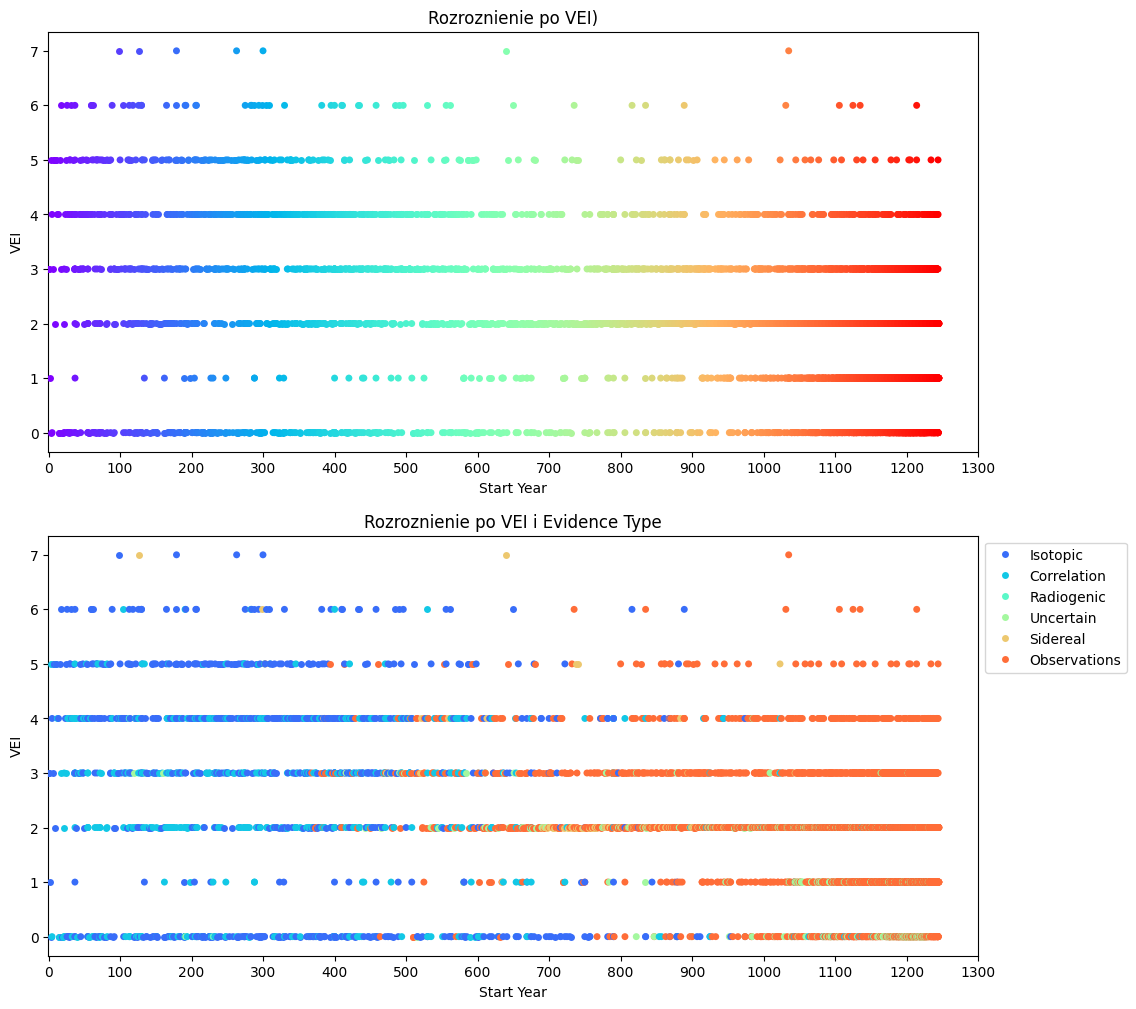

In [ ]:
# YOUR CODE HERE
fig, axes = plt.subplots(2,1,figsize=(12,12))

sns.stripplot(data = eruptions_data, x='Start Year', y='VEI', jitter=True, ax=axes[0], palette='rainbow')
axes[0].set_title('Rozroznienie po VEI)')
axes[0].set_ylabel('VEI')

sns.stripplot(data = eruptions_data, x='Start Year', y='VEI', jitter=True, ax=axes[1], hue='Evidence Type', palette='rainbow')
axes[1].set_title('Rozroznienie po VEI i Evidence Type')
axes[1].set_ylabel('VEI')

axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))


xticks = range(0, 1400, 100)
axes[0].set_xticks(xticks)
axes[1].set_xticks(xticks)

axes[0].set_xticklabels([str(year) for year in xticks])
axes[1].set_xticklabels([str(year) for year in xticks])